## Dataset chosen: Online Education System

This dataset provides a basic overview of the online education system in India.

The dataset includes various factors such as gender, home location, level of education, age, device usage, economic status, family size, internet accessibility, sports involvement, elderly care, sleep patterns, social media usage, gaming interests, study environment, group studies, academic performance, online interaction, doubt clarification, learning preferences, and satisfaction levels.

# Introdution

Understanding customer satisfaction is very important for business nowadays, satisfied customers contribute to a good company's reputation and will lead to repeat purchases. 
Linking with the chosen set of data we can use classification algorithms to achieve my goal of this analysis which is to models that can predict whether a customer is satisfied or dissatisfied based on the attributes. 

## Justification of Project Goals using Classification Algorithms

Classification Algorithms: Classification algorithms, such as random forests, logistic regression and support vector machines, are good at categorizing customers into satisfaction classes (e.g good, average, bad). By training these models on label data, they can learn to distinguish between different satisfaction levels based on input features. 

I'll start importing necessary Python Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ONLINE EDUCATION SYSTEM.csv')

## Exploratory Data Analysis (EDA)

"Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods".(IBM,2020)

After downloading the CSV file I chose, I'll use Pandas' CSV read function, so I can get a general idea of ​​our dataset by calling the first 5 rows with the head function in the next sept.

In [3]:
df.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average


Below we can see the Dtype of the resources and if the dataframe has any missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Gender                                                         1033 non-null   object
 1   Home Location                                                  1033 non-null   object
 2   Level of Education                                             1033 non-null   object
 3   Age(Years)                                                     1033 non-null   int64 
 4   Number of Subjects                                             1033 non-null   int64 
 5   Device type used to attend classes                             1033 non-null   object
 6   Economic status                                                1033 non-null   object
 7   Family size                                                    1033 n

My objective of this analysis is student satisfaction with the online class, often student satisfaction is linked to the performance they had in online studies, now at this stage of the work I will check the relationship between online performance and my other numerical columns and I exclude those that do not have a high relationship, so as not to interfere with my machine learning module.
The results furthest from 1 are the least related to my objective.

In [5]:
df2=df.select_dtypes(exclude=object)

In [6]:
df2.corr()

,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online
Age(Years),1.000000,-0.011505,0.016893,0.072625,0.005344,-0.072031,0.005455,0.171943,0.125559,0.114965
Number of Subjects,-0.011505,1.000000,0.035997,-0.025915,0.024280,0.051531,0.004833,-0.005144,-0.008595,0.012740
Family size,0.016893,0.035997,1.000000,-0.020996,0.060614,-0.015787,0.053512,-0.024268,-0.019461,0.001549
Internet facility in your locality,0.072625,-0.025915,-0.020996,1.000000,-0.011554,0.051838,0.082772,0.204391,0.158990,0.257339
Study time (Hours),0.005344,0.024280,0.060614,-0.011554,1.000000,-0.044385,-0.125986,0.148859,0.175169,0.134344
Sleep time (Hours),-0.072031,0.051531,-0.015787,0.051838,-0.044385,1.000000,0.144587,0.032598,0.043402,0.065020
Time spent on social media (Hours),0.005455,0.004833,0.053512,0.082772,-0.125986,0.144587,1.000000,-0.083972,-0.101847,-0.086568
Your interaction in online mode,0.171943,-0.005144,-0.024268,0.204391,0.148859,0.032598,-0.083972,1.000000,0.723216,0.557507
Clearing doubts with faculties in online mode,0.125559,-0.008595,-0.019461,0.158990,0.175169,0.043402,-0.101847,0.723216,1.000000,0.561091
Performance in online,0.114965,0.012740,0.001549,0.257339,0.134344,0.065020,-0.086568,0.557507,0.561091,1.000000


In [7]:
df2.corr().style.background_gradient(cmap="Blues")

,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online
Age(Years),1.000000,-0.011505,0.016893,0.072625,0.005344,-0.072031,0.005455,0.171943,0.125559,0.114965
Number of Subjects,-0.011505,1.000000,0.035997,-0.025915,0.024280,0.051531,0.004833,-0.005144,-0.008595,0.012740
Family size,0.016893,0.035997,1.000000,-0.020996,0.060614,-0.015787,0.053512,-0.024268,-0.019461,0.001549
Internet facility in your locality,0.072625,-0.025915,-0.020996,1.000000,-0.011554,0.051838,0.082772,0.204391,0.158990,0.257339
Study time (Hours),0.005344,0.024280,0.060614,-0.011554,1.000000,-0.044385,-0.125986,0.148859,0.175169,0.134344
Sleep time (Hours),-0.072031,0.051531,-0.015787,0.051838,-0.044385,1.000000,0.144587,0.032598,0.043402,0.065020
Time spent on social media (Hours),0.005455,0.004833,0.053512,0.082772,-0.125986,0.144587,1.000000,-0.083972,-0.101847,-0.086568
Your interaction in online mode,0.171943,-0.005144,-0.024268,0.204391,0.148859,0.032598,-0.083972,1.000000,0.723216,0.557507
Clearing doubts with faculties in online mode,0.125559,-0.008595,-0.019461,0.158990,0.175169,0.043402,-0.101847,0.723216,1.000000,0.561091
Performance in online,0.114965,0.012740,0.001549,0.257339,0.134344,0.065020,-0.086568,0.557507,0.561091,1.000000


I can see that if the student has had some type of online interaction or clearing doubts with faculties, there may be some correlation with our target, as well as the number of hours they spend studying.

I'll drop the columns with less correlation with my target. 

In [8]:
df3= df.drop(columns=['Time spent on social media (Hours)','Number of Subjects','Sleep time (Hours)','Family size','Are you involved in any sports?','Interested in Gaming?','Average marks scored before pandemic in traditional classroom'])

In [9]:
df3.head()

,Gender,Home Location,Level of Education,Age(Years),Device type used to attend classes,Economic status,Internet facility in your locality,Do elderly people monitor you?,Study time (Hours),Have separate room for studying?,Engaged in group studies?,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,Laptop,Middle Class,5,Yes,3,No,No,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,Laptop,Middle Class,1,Yes,7,Yes,No,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,Laptop,Middle Class,2,Yes,6,Yes,No,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,Laptop,Middle Class,4,Yes,3,No,yes,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,Laptop,Middle Class,3,No,8,Yes,yes,3,3,Both,6,Average


Below I checked if my dataset has some null or missing values.

In [10]:
df3.isnull().sum()

Gender                                            0
Home Location                                     0
Level of Education                                0
Age(Years)                                        0
Device type used to attend classes                0
Economic status                                   0
Internet facility in your locality                0
Do elderly people monitor you?                    0
Study time (Hours)                                0
Have separate room for studying?                  0
Engaged in group studies?                         0
Your interaction in online mode                   0
Clearing doubts with faculties in online mode     0
Interested in?                                    0
Performance in online                             0
Your level of satisfaction in Online Education    0
dtype: int64

And now if there is some duplicated values

In [11]:
duplicated=df3.duplicated().sum()
print(duplicated)

3


So, there are 3 duplicates I'll drop them. 

In [12]:
df3.drop_duplicates(inplace=True)

In [13]:
df3.shape

(1030, 16)

I will rename my columns to follow a pattern and have a better understanding.

In [14]:
df3.rename(columns={'Age(Years)': 'Age','Device type used to attend classes':'Device type Used','Clearing doubts with faculties in online mode':'Clearing doubts','Your level of satisfaction in Online Education':'Level of Satisfaction','Do elderly people monitor you?':'Monitoring for the elderly','Have separate room for studying?':'Separate room for Studying','Engaged in group studies?':'Group Studies','Interested in?':'Learning Method'}, inplace=True)

In [15]:
df3.head()

,Gender,Home Location,Level of Education,Age,Device type Used,Economic status,Internet facility in your locality,Monitoring for the elderly,Study time (Hours),Separate room for Studying,Group Studies,Your interaction in online mode,Clearing doubts,Learning Method,Performance in online,Level of Satisfaction
0,Male,Urban,Under Graduate,18,Laptop,Middle Class,5,Yes,3,No,No,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,Laptop,Middle Class,1,Yes,7,Yes,No,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,Laptop,Middle Class,2,Yes,6,Yes,No,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,Laptop,Middle Class,4,Yes,3,No,yes,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,Laptop,Middle Class,3,No,8,Yes,yes,3,3,Both,6,Average


I'm going to draw some graphs to get a better view of my data set

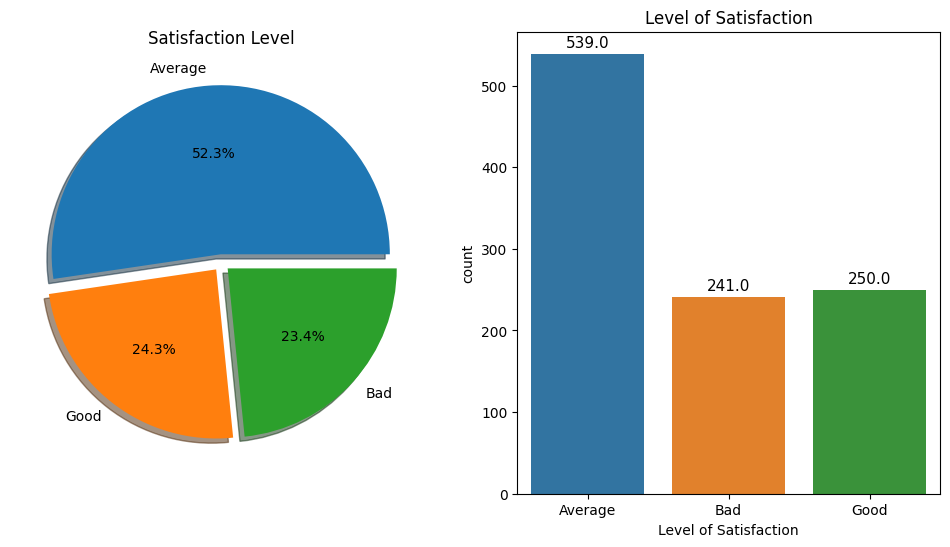

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df3["Level of Satisfaction"].value_counts().plot(kind="pie", explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Satisfaction Level")
ax[0].set_ylabel('')

count = sns.countplot(x="Level of Satisfaction", data=df3, ax=ax[1])
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Level of Satisfaction")
plt.show()

As we can see, this dataset is imbalanced.

More than 50% (539) of students in this dataset have average satisfaction, 24,3% (250) have good satisfaction, and  23,4% (241) of students have bad satisfaction in online education.

I'll try to solve this imbalanced problem before applying some machine learning model, for now, I'm just understanding my data.  

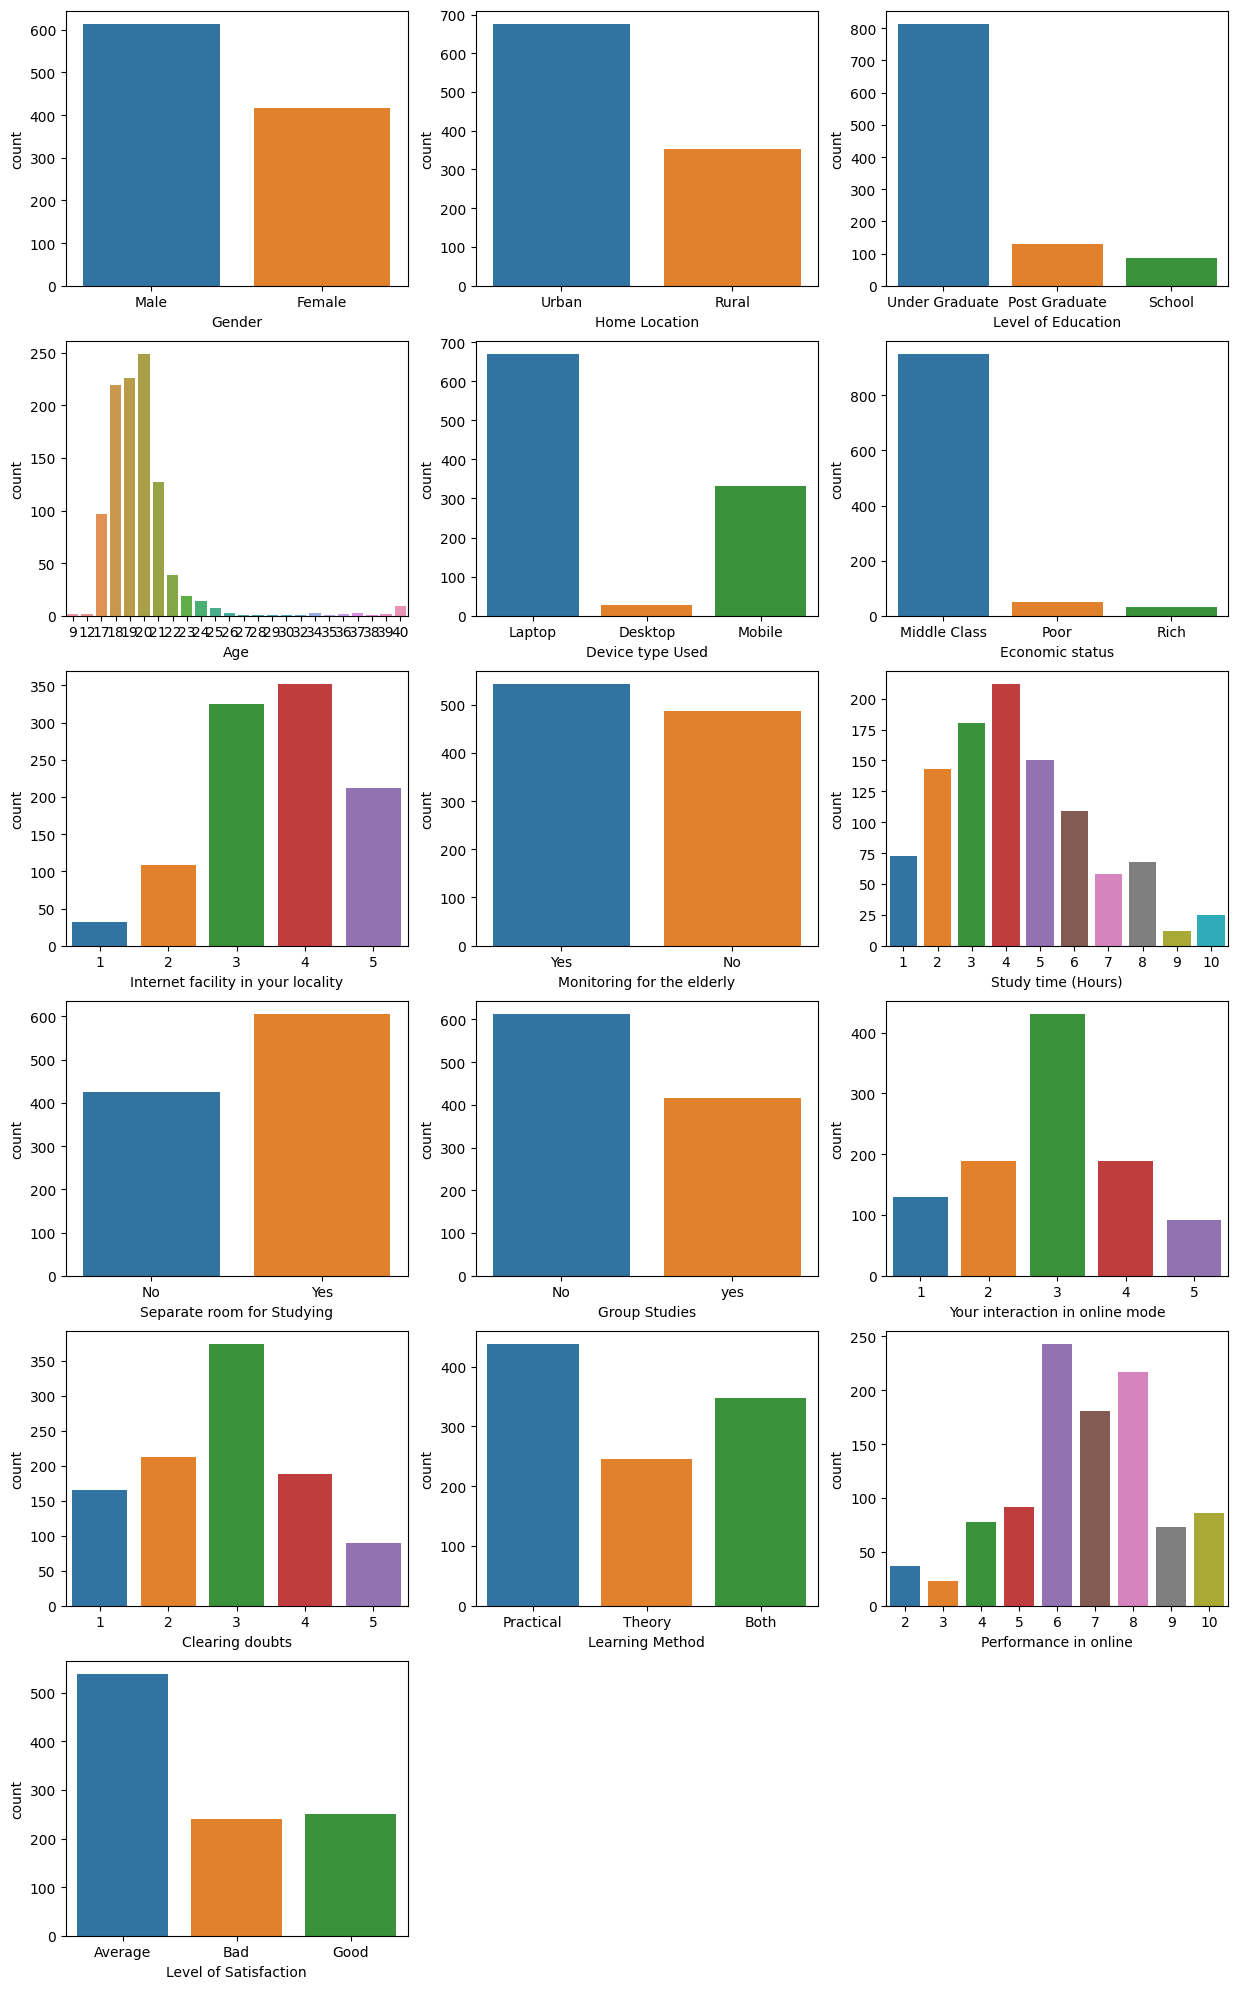

In [17]:
i = 1
plt.figure(figsize = (15,25))
for feature in df3:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = df3)
    i +=1

There are more males than females in this dataset with an age distribution ranging from 9 to 40 years. The majority live in the city area and have a moderate financial condition. A large number are in a graduate program. We also can see that most of the study has around 3 a 4 hours of studying and some of them have a separate room for studying. These students mostly use laptops to do online learning.

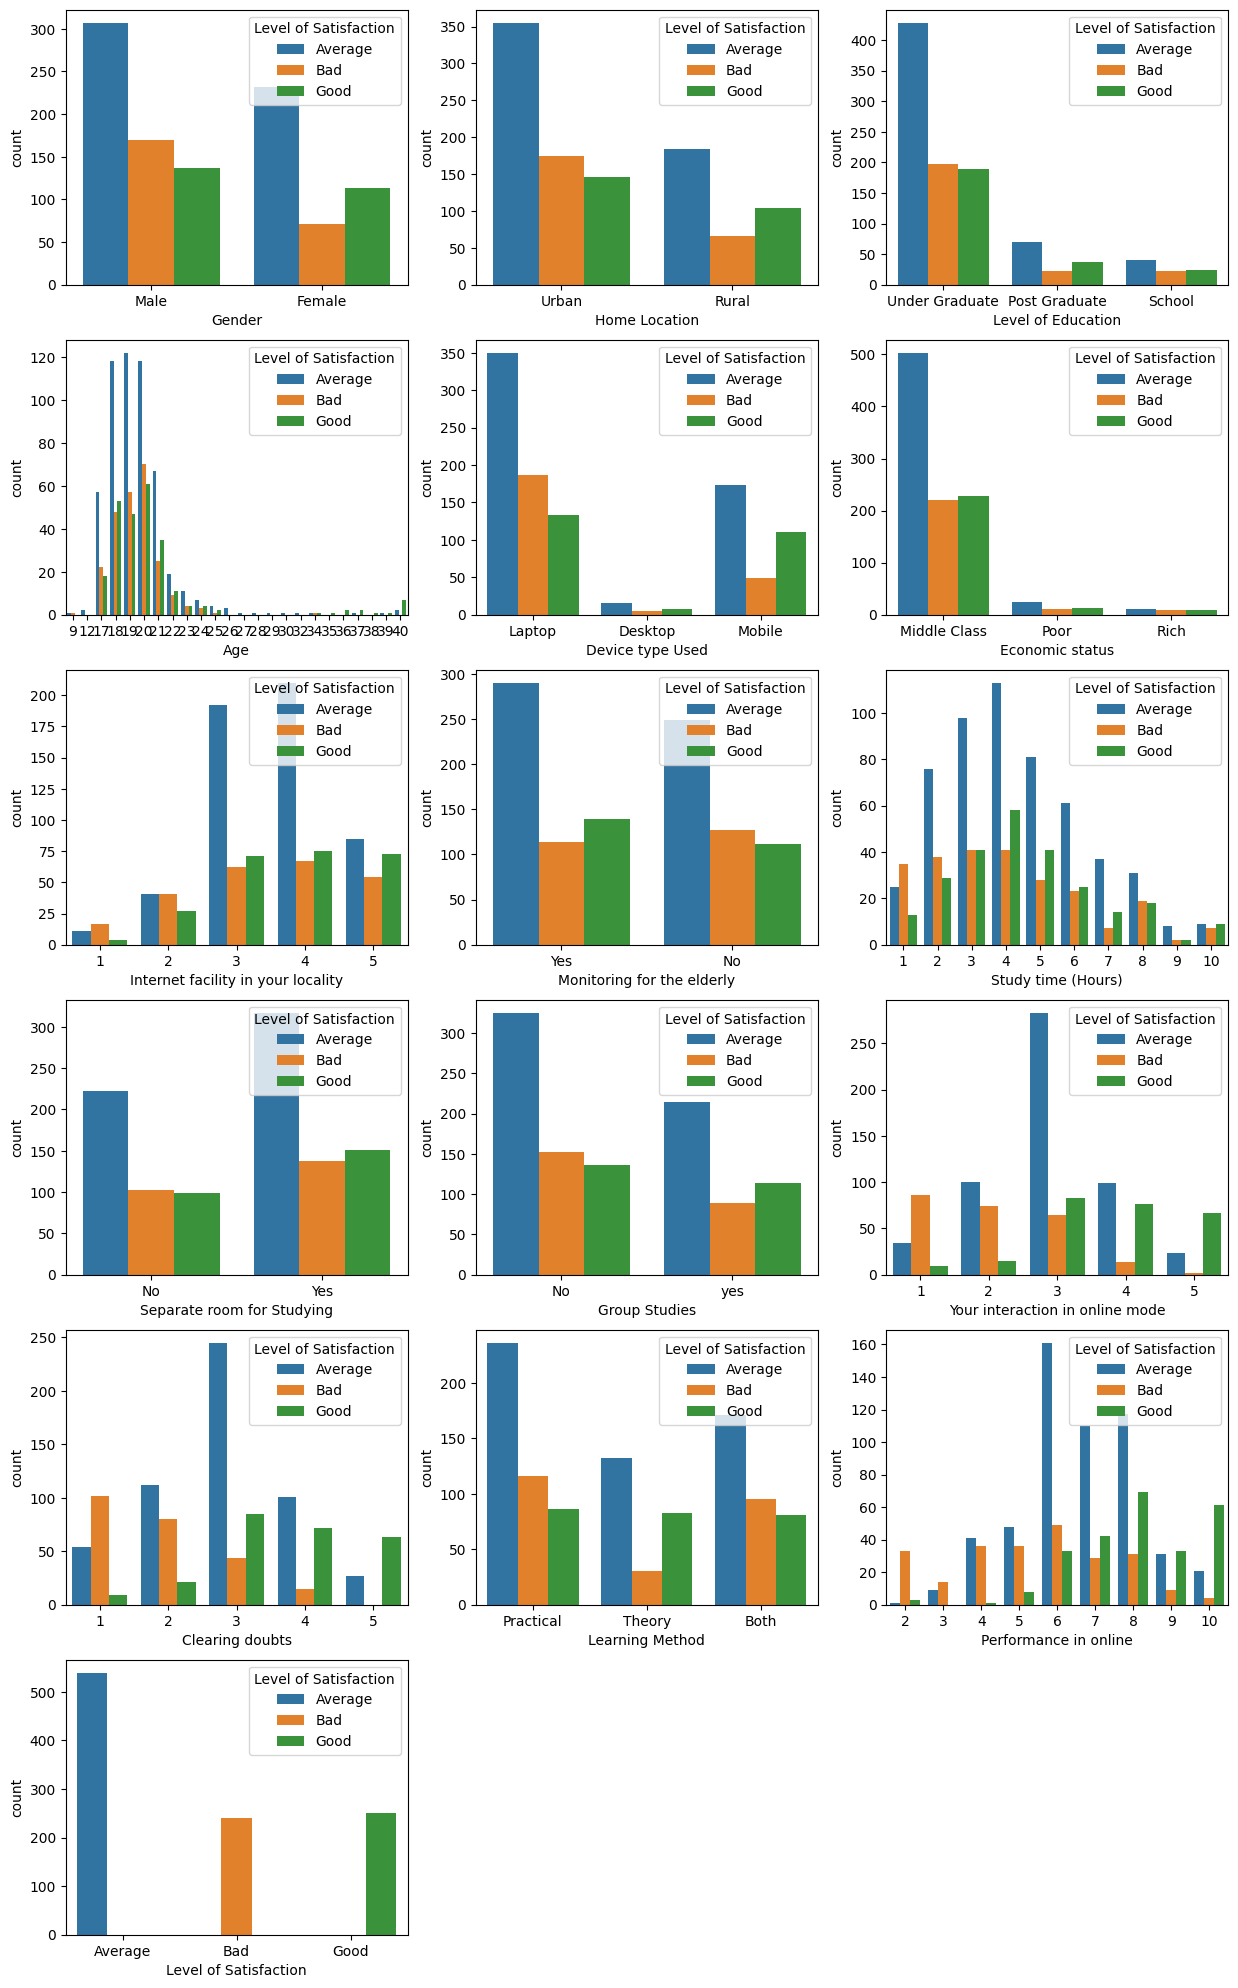

In [18]:
i = 1
plt.figure(figsize = (15,25))
for feature in df3:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Level of Satisfaction', data = df3)
    i +=1

Now I will check some correlation between some features to understand our dataset.

In [19]:
pd.crosstab(df3["Home Location"], df3["Economic status"]).style.background_gradient(cmap='Blues')

Economic status,Middle Class,Poor,Rich
Home Location,,,
Rural,316,35,3
Urban,635,14,27


Here we can see that the majority of students are from urban areas and middle class.

Below I will check the correlation between the level of satisfaction and online performance, and we can see that the majority of students who performed well online have average satisfaction.

In [20]:
pd.crosstab(df3["Performance in online"], df3["Level of Satisfaction"]).style.background_gradient(cmap='Blues')

Level of Satisfaction,Average,Bad,Good
Performance in online,,,
2,1,33,3
3,9,14,0
4,41,36,1
5,48,36,8
6,161,49,33
7,110,29,42
8,117,31,69
9,31,9,33
10,21,4,61


Below we can see that the more you interact in classes, the better your performance online.

In [21]:
pd.crosstab(df3["Your interaction in online mode"], df3["Performance in online"]).style.background_gradient(cmap='Blues')

Performance in online,2,3,4,5,6,7,8,9,10
Your interaction in online mode,,,,,,,,,
1,31,10,20,14,23,9,18,1,3
2,4,9,29,31,46,28,25,11,6
3,2,4,24,43,140,103,85,17,13
4,0,0,5,3,29,35,74,26,17
5,0,0,0,1,5,6,15,18,47


In [22]:
pd.crosstab(df3["Your interaction in online mode"], df3["Level of Satisfaction"]).style.background_gradient(cmap='Blues')

Level of Satisfaction,Average,Bad,Good
Your interaction in online mode,,,
1,34,86,9
2,100,74,15
3,283,65,83
4,99,14,76
5,23,2,67


In the next correlation we can see that even though there are fewer women in this dataset, they have greater interaction in classes.

In [23]:
pd.crosstab([df3["Gender"], df3["Clearing doubts"]], df3["Level of Satisfaction"]).style.background_gradient(cmap='Blues')

I will check if there are any outliers in the Satisfaction Level and Performance features online, if so I will drop them for better accuracy in my model.

<Axes: xlabel='Level of Satisfaction', ylabel='Performance in online'>

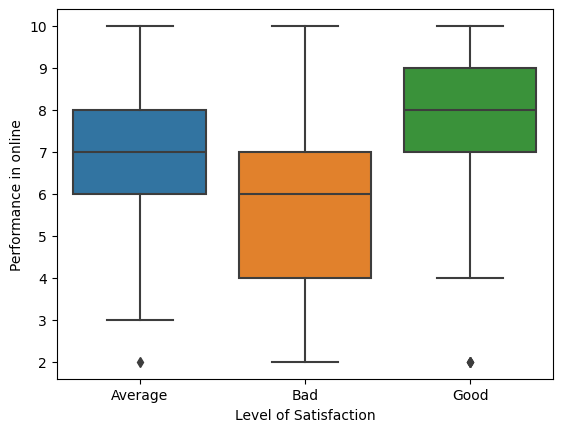

In [24]:
sns.boxplot(x='Level of Satisfaction', y='Performance in online', data=df3)

Above we can see that there are some outliers in the average and good satisfaction, I will check how many there are and see if it is possible to drop them.
Calculate the interquartile range (IQR) of the Performance in oline

In [25]:
Q1 = df3['Performance in online'].quantile(0.25)
Q3 = df3['Performance in online'].quantile(0.75)
IQR = Q3 - Q1

Set lower and upper limits for outliers

In [26]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [27]:
outliers_before = df3[(df3['Performance in online'] < lower_bound) | (df3['Performance in online'] > upper_bound)].shape[0]
print("Quantity of outliers:", outliers_before)

Quantity of outliers: 37


In [28]:
37*100/1030

3.592233009708738

Those 37 rows represent only 3% of my dataset, so I'll drop then. 

In [29]:
df4= df3[(df3['Performance in online'] >= lower_bound) & (df3['Performance in online'] <= upper_bound)]

In [30]:
df4.shape

(993, 16)

I will split two different datasets, one with the target as satisfaction level and one with online performance as the target.

In [31]:
df4['Level of Satisfaction'].value_counts()

Level of Satisfaction
Average    538
Good       247
Bad        208
Name: count, dtype: int64

I will copy my df4 dataset to a new one to start building the dataset to apply the machine learning models

In [32]:
df_1=df4

Encoding Ordinal and Nominal Variable to check the correlation with the target

In [34]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

# List of columns to encode
columns_to_encode = ['Gender', 'Home Location', 'Level of Education', 'Device type Used',
                     'Economic status', 'Monitoring for the elderly', 'Separate room for Studying',
                     'Group Studies', 'Learning Method', 'Level of Satisfaction']

# Create a LabelEncoder instance
enc = LabelEncoder()

# Apply encoding to multiple columns
df_1_encoded = df_1.apply(lambda col: enc.fit_transform(col) if col.name in columns_to_encode else col)

# then assign it to the original dataframe
df_1 = df_1_encoded

In [36]:
df_1.head()

,Gender,Home Location,Level of Education,Age,Device type Used,Economic status,Internet facility in your locality,Monitoring for the elderly,Study time (Hours),Separate room for Studying,Group Studies,Your interaction in online mode,Clearing doubts,Learning Method,Performance in online,Level of Satisfaction
0,1,1,2,18,1,0,5,1,3,0,0,1,1,1,6,0
1,1,1,2,19,1,0,1,1,7,1,0,1,1,2,3,1
2,1,0,2,18,1,0,2,1,6,1,0,1,1,0,6,1
3,1,1,2,18,1,0,4,1,3,0,1,1,2,2,4,1
4,1,0,2,18,1,0,3,0,8,1,1,3,3,0,6,0


Now that my entire dataframe is in numeric features, I will again check the level of correlation between the features with my target (Satisfaction Level) and eliminate the columns with the least correlation

In [37]:
df_1.corr().style.background_gradient(cmap="Blues")

,Gender,Home Location,Level of Education,Age,Device type Used,Economic status,Internet facility in your locality,Monitoring for the elderly,Study time (Hours),Separate room for Studying,Group Studies,Your interaction in online mode,Clearing doubts,Learning Method,Performance in online,Level of Satisfaction
Gender,1.000000,-0.070334,-0.005586,-0.039882,-0.056213,-0.033186,-0.062541,-0.023093,-0.093936,0.023048,-0.062208,-0.111571,-0.096775,-0.135927,-0.068411,-0.003517
Home Location,-0.070334,1.000000,0.017156,0.002402,-0.268064,-0.025143,0.274978,0.012502,-0.061031,0.090919,0.032850,-0.080950,-0.100838,-0.130840,-0.024737,-0.048942
Level of Education,-0.005586,0.017156,1.000000,-0.343715,-0.019565,0.031824,0.066041,0.006984,0.054382,0.016111,-0.073161,-0.048474,-0.040592,-0.029481,0.019420,-0.024272
Age,-0.039882,0.002402,-0.343715,1.000000,-0.034954,-0.004241,0.071128,-0.042263,0.000833,0.022952,0.103821,0.170093,0.122013,-0.129896,0.108653,0.119656
Device type Used,-0.056213,-0.268064,-0.019565,-0.034954,1.000000,0.019539,-0.242119,-0.041488,-0.047583,-0.201094,-0.009733,0.098302,0.125376,0.150220,0.032529,0.072741
Economic status,-0.033186,-0.025143,0.031824,-0.004241,0.019539,1.000000,0.064817,-0.041812,-0.013367,-0.062235,-0.006949,0.066189,0.062739,0.008255,0.061906,0.042731
Internet facility in your locality,-0.062541,0.274978,0.066041,0.071128,-0.242119,0.064817,1.000000,0.013399,-0.014561,0.224949,0.040367,0.183094,0.141300,-0.062630,0.241856,0.051670
Monitoring for the elderly,-0.023093,0.012502,0.006984,-0.042263,-0.041488,-0.041812,0.013399,1.000000,0.091915,0.041993,0.079262,0.094964,0.102562,0.029756,0.069674,0.010382
Study time (Hours),-0.093936,-0.061031,0.054382,0.000833,-0.047583,-0.013367,-0.014561,0.091915,1.000000,0.094952,0.014164,0.151416,0.173067,-0.011038,0.138738,0.014186
Separate room for Studying,0.023048,0.090919,0.016111,0.022952,-0.201094,-0.062235,0.224949,0.041993,0.094952,1.000000,0.080831,0.072280,0.062687,-0.053571,0.079522,0.013973


Deleting columns with the least relationship to my target

In [38]:
df_1=df_1.drop(columns=['Home Location','Level of Education','Device type Used','Economic status','Monitoring for the elderly','Separate room for Studying','Learning Method'])

In [39]:
df_1.head(1)

,Gender,Age,Internet facility in your locality,Study time (Hours),Group Studies,Your interaction in online mode,Clearing doubts,Performance in online,Level of Satisfaction
0,1,18,5,3,0,1,1,6,0


# Machine Learning

First I will apply normalization and standardization before building ML models.

In [40]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

Normalization

In [42]:
normalizer = Normalizer()
X_normalized = pd.DataFrame(normalizer.fit_transform(df_1.drop('Level of Satisfaction', axis=1)), columns=df_1.columns[:-1])

Standarization

In [43]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_1.drop('Level of Satisfaction', axis=1)), columns=df_1.columns[:-1])

### Building machine learning models and comparing the results

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Here mainly, I will define some 'python user defined functions' to ease our work. With the help of this functions i will build each model and compare their results.


In [46]:
def fit_predict_score(Model, X_train, y_train, X_test, y_test):
    """Fit the model of your choice, predict for test data, and returns classification metrics."""
    model = Model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return train_score, test_score, precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')

def model_comparison(X, y):
    """Creates a DataFrame comparing Logistic Regression, K-Nearest Neighbors, Decision Tree,
    Random Forest, Support Vector Machines"""

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    lr_train_score, lr_test_score, lr_pr, lr_re, lr_f1 = fit_predict_score(LogisticRegression(), X_train, y_train, X_test, y_test)
    knn_train_score, knn_test_score, knn_pr, knn_re, knn_f1 = fit_predict_score(KNeighborsClassifier(), X_train, y_train, X_test, y_test)
    dtc_train_score, dtc_test_score, dtc_pr, dtc_re, dtc_f1 = fit_predict_score(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)
    rfc_train_score, rfc_test_score, rfc_pr, rfc_re, rfc_f1 = fit_predict_score(RandomForestClassifier(), X_train, y_train, X_test, y_test)
    svc_train_score, svc_test_score, svc_pr, svc_re, svc_f1 = fit_predict_score(SVC(), X_train, y_train, X_test, y_test)

    models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machines']
    train_score = [lr_train_score, knn_train_score, dtc_train_score, rfc_train_score, svc_train_score]
    test_score = [lr_test_score, knn_test_score, dtc_test_score, rfc_test_score, svc_test_score]
    precision = [lr_pr, knn_pr, dtc_pr, rfc_pr]
    recall = [lr_re, knn_re, dtc_re, rfc_re, svc_re]
    f1 = [lr_f1, knn_f1, dtc_f1, rfc_f1, svc_f1]

    model_comparison = pd.DataFrame(data=[models, train_score, test_score, precision, recall, f1]).T.rename({0: 'Model',
                                                                                                             1:'Training Score',
                                                                                                             2: 'Test Score (Accuracy)',
                                                                                                             3: 'Precision',
                                                                                                             4: 'Recall',
                                                                                                             5: 'F1 Score'
                                                                                                            }, axis=1)

    return model_comparison

My next step is to divide the data into “attributes” and “labels”.
Attributes are the independent variables while labels are dependent variables whose values
are to be predicted.

In [47]:
X = df_1.drop(['Level of Satisfaction'], axis=1)
y = df_1['Level of Satisfaction']

After defining function, X and y, I'll will build the models with normal default dataframe, normalized dataframe and standardized dataframe.

Then we will see the scores for these 3 methods

I'll import some machine learning libraries.

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [53]:
print("Default DataFrame:")
display(model_comparison(X, y))
print('-'*40)
print("\nNormalized DataFrame:")
display(model_comparison(X_normalized, y))
print('-'*40)
print("\nStandardized DataFrame:")
display(model_comparison(X_scaled, y))

Default DataFrame:


,Model,Training Score,Test Score (Accuracy),Precision,Recall,F1 Score
0,Logistic Regression,0.640602,0.573171,0.573171,0.573171,0.573171
1,K-Nearest Neighbors,0.694737,0.582317,0.582317,0.582317,0.582317
2,Decision Tree,0.996992,0.490854,0.490854,0.490854,0.490854
3,Random Forest,0.996992,0.588415,0.588415,0.588415,0.588415
4,Support Vector Machines,0.589474,0.52439,None,0.52439,0.52439


----------------------------------------

Normalized DataFrame:


,Model,Training Score,Test Score (Accuracy),Precision,Recall,F1 Score
0,Logistic Regression,0.560902,0.5,0.5,0.5,0.5
1,K-Nearest Neighbors,0.669173,0.579268,0.579268,0.579268,0.579268
2,Decision Tree,0.996992,0.463415,0.463415,0.463415,0.463415
3,Random Forest,0.996992,0.564024,0.564024,0.564024,0.564024
4,Support Vector Machines,0.562406,0.5,None,0.5,0.5


----------------------------------------

Standardized DataFrame:


,Model,Training Score,Test Score (Accuracy),Precision,Recall,F1 Score
0,Logistic Regression,0.646617,0.588415,0.588415,0.588415,0.588415
1,K-Nearest Neighbors,0.691729,0.594512,0.594512,0.594512,0.594512
2,Decision Tree,0.996992,0.490854,0.490854,0.490854,0.490854
3,Random Forest,0.996992,0.579268,0.579268,0.579268,0.579268
4,Support Vector Machines,0.702256,0.582317,None,0.582317,0.582317


As the dataset is imbalanced, I will apply the SMOTE function that creates synthetic data to see if I will have better accuracy.

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
sm = SMOTE(random_state=1)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [56]:
print("SMOTE applied DataFrame:")
display(model_comparison(X_resampled, y_resampled))

SMOTE applied DataFrame:


,Model,Training Score,Test Score (Accuracy),Precision,Recall,F1 Score
0,Logistic Regression,0.616096,0.590994,0.590994,0.590994,0.590994
1,K-Nearest Neighbors,0.769658,0.692308,0.692308,0.692308,0.692308
2,Decision Tree,0.99445,0.630394,0.630394,0.630394,0.630394
3,Random Forest,0.99445,0.705441,0.705441,0.705441,0.705441
4,Support Vector Machines,0.623497,0.609756,None,0.609756,0.609756


We can see that the results are better, just need to be careful with the overfitting in the model Decision Tree and Random Forest

## Machine Learning Models

- K-Nearest Neighbors
- Logistic Regression
- Hyperparameters

I'll start splitting the data into training, and testing.

The training set is a portion of the dataset that is used to train the machine learning model

The testing set is another portion of the dataset that is held out and not used during the training process.

I'll test 30% for the model to see the accuracy. 

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.30, random_state = 42) 

In [92]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1129, 8), (485, 8), (1129,), (485,))

## K-Nearest Neighbors 

I'll create KNN Classifier and than train the model and predict the response

In [93]:
kNN = KNeighborsClassifier(n_neighbors = 3)
kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)

In [94]:
from sklearn import metrics
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.71


## Hyperparameters

In [75]:
import numpy as np
neighbors = np.arange(1, 11)                  
train_accuracy = np.zeros(len(neighbors))     
test_accuracy = np.zeros(len(neighbors)) 

Initialise an object knn using KNeighborsClassifier method
Call fit method to implement the ML KNeighborsClassifier model
Save the score value in the train_accuracy arra

In [97]:
for i, k in enumerate(neighbors):                         
    kNN = KNeighborsClassifier(n_neighbors = k)            

   
    kNN.fit(X_train, y_train)                             
    train_accuracy[i] = kNN.score(X_train, y_train)       


    test_accuracy[i] = kNN.score(X_test, y_test) 

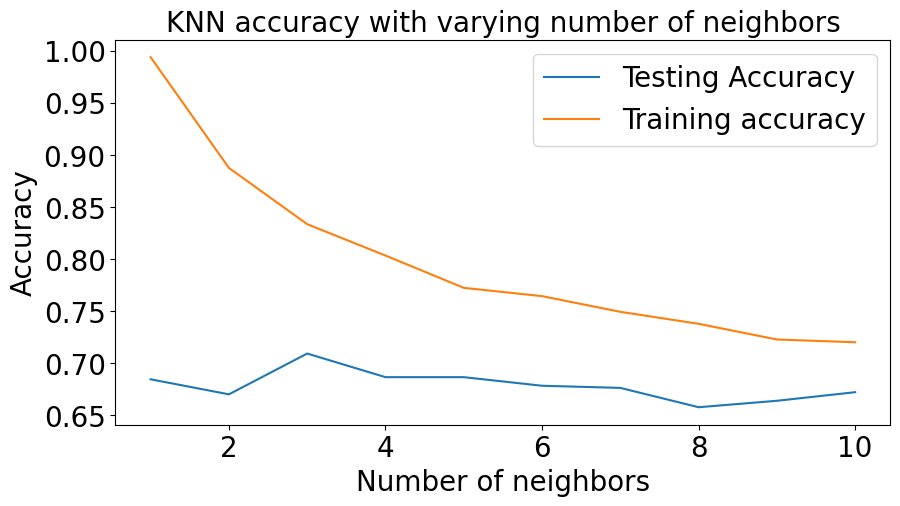

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# References

https://www.kaggle.com/datasets/bhavyajha14/online-educations-system/data

IBM. “What Is Exploratory Data Analysis? | IBM.” Www.ibm.com, 2020, www.ibm.com/topics/exploratory-data-analysis.